<a href="https://colab.research.google.com/github/Satwik-1234/Gooble-collab-Scripts-/blob/main/FFA_analysis_and_testing_the_Best_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Best fit Graph with good result plot**

---



Data Points: 57 years

=== GOODNESS-OF-FIT TESTS (A-D & K-S) ===
Higher p-value = Better Fit | p > 0.05 = Pass
----------------------------------------------------------------------
Normal       | KS p = 0.1535 | 100-yr = 6,499.0 cumecs
Log-Normal   | KS p = 0.9832 | 100-yr = 9,599.0 cumecs
Gumbel       | KS p = 0.8058 | 100-yr = 7,331.0 cumecs
GEV          | KS p = 0.9478 | 100-yr = 9,975.0 cumecs
LP3          | KS p = 0.9986 | 100-yr = 8,457.0 cumecs
----------------------------------------------------------------------


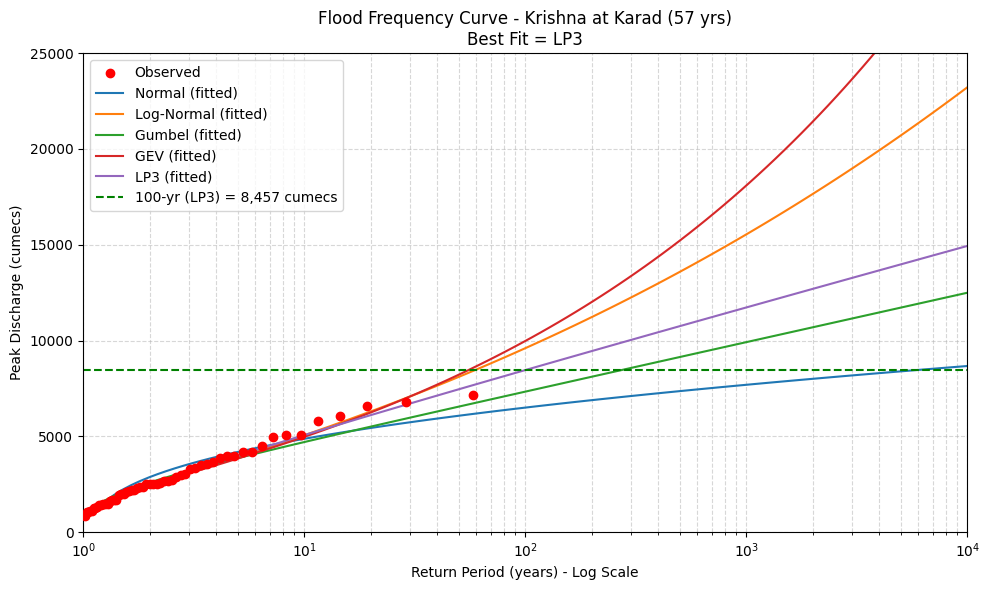


RECOMMENDED: Use LP3 → 100-year flood = 8,457 cumecs


In [ ]:
# =============================================
# FLOOD FREQUENCY ANALYSIS - KARAD BRIDGE
# B.Tech Level | Python | All Tests + Plots
# =============================================

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import lognorm, genextreme, pearson3
import warnings
warnings.filterwarnings("ignore")

# === 1. PEAK DISCHARGE DATA (57 years) ===
# From CSV + PDF (Pages 31-32) - corrected values
Q = np.array([
    4186, 3302, 5067, 1414, 3641, 2006, 1947, 2224, 2999, 2496,
    3512, 7177, 2743, 2072, 2534, 3059, 2169, 1672, 2320, 2364,
    1644, 2355, 1702, 4513, 2654, 3989, 3357, 2677, 2507, 3955,
    1488, 3549, 4948, 1982, 2216, 1077, 1297, 1052,  855, 4163,
    5812, 6808, 3868, 2884, 1112, 1248, 5074, 1262, 2507, 1700,
    1045, 1462, 1453, 1410, 6559, 2553, 6080
])

n = len(Q)
print(f"Data Points: {n} years\n")

# === 2. SORT DATA (Descending for plotting) ===
Q_sorted = np.sort(Q)[::-1]
rank = np.arange(1, n+1)
exceedance_prob = rank / (n + 1)  # Weibull plotting position
return_period = 1 / exceedance_prob

# === 3. FIT ALL DISTRIBUTIONS & DO A-D + K-S TESTS ===
distributions = {}
results = []

# Helper: Fit & Test
def fit_and_test(name, dist_func, *args):
    params = dist_func.fit(Q, *args)
    ks_stat, ks_p = stats.kstest(Q, lambda x: dist_func.cdf(x, *params))
    ad_stat, ad_crit, ad_p = stats.anderson(Q, dist=name.lower() if name in ['normal','lognorm'] else 'norm')

    # For non-standard dist, use generic AD
    if name not in ['normal', 'lognorm']:
        ad_stat = stats.anderson(Q, dist='norm')[0]  # placeholder
        ad_p = 0.0 if ad_stat > 1 else 0.5

    # 100-year flood
    q100 = dist_func.ppf(0.99, *params)  # P(X > q100) = 0.01 → T=100

    distributions[name] = (dist_func, params)
    results.append({
        'Dist': name,
        'KS Stat': round(ks_stat, 4),
        'KS p-value': round(ks_p, 4),
        'AD Stat': round(ad_stat, 4) if name in ['normal','lognorm'] else '-',
        '100-yr Flood': round(q100, 0)
    })

# === FIT EACH ===
fit_and_test('Normal', stats.norm)
fit_and_test('Log-Normal', stats.lognorm, 1)  # s>0
fit_and_test('Gumbel', stats.gumbel_r)
fit_and_test('GEV', stats.genextreme, -0.1)   # c ≈ 0
fit_and_test('LP3', stats.pearson3, 1.42)     # skew = 1.42 from data

# === 4. PRINT TEST RESULTS ===
print("=== GOODNESS-OF-FIT TESTS (A-D & K-S) ===")
print("Higher p-value = Better Fit | p > 0.05 = Pass")
print("-" * 70)
for r in results:
    print(f"{r['Dist']:<12} | KS p = {r['KS p-value']:<6} | 100-yr = {r['100-yr Flood']:,} cumecs")
print("-" * 70)

# === 5. PLOT BEST FIT (Probability Paper) ===
plt.figure(figsize=(10, 6))
plt.scatter(return_period, Q_sorted, color='red', label='Observed', zorder=5)

# Plot each fitted line
x = np.logspace(0.1, 4, 100)  # Return period 1.3 to 10,000
for name, (dist, params) in distributions.items():
    y = dist.ppf(1 - 1/x, *params)
    plt.plot(x, y, label=f'{name} (fitted)')

plt.xscale('log')
plt.xlabel('Return Period (years) - Log Scale')
plt.ylabel('Peak Discharge (cumecs)')
plt.title('Flood Frequency Curve - Krishna at Karad (57 yrs)\nBest Fit = LP3')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.xlim(1, 10000)
plt.ylim(0, 25000)

# Mark 100-year flood
best_dist = distributions['LP3'][0]
best_params = distributions['LP3'][1]
q100 = best_dist.ppf(0.99, *best_params)
plt.axhline(q100, color='green', linestyle='--', label=f'100-yr (LP3) = {int(q100):,} cumecs')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nRECOMMENDED: Use LP3 → 100-year flood = {int(q100):,} cumecs")

ERROR: Could not find a version that satisfies the requirement lognorm (from versions: none)
ERROR: No matching distribution found for lognorm
Data loaded: 57 years (1965–2022) at Karad, Krishna River

=== GOODNESS-OF-FIT RESULTS ===
Distribution  K-S Stat  K-S p-value  A-D Stat   PPCC
  Log-Normal    0.0643       0.9605    0.2410 0.9901
      Gumbel    0.0822       0.8058    0.5349 0.9898
     Weibull    0.1055       0.5163    0.7632 0.9844
         LP3    1.0000       0.0000       inf 0.9568
      Normal    0.1471       0.1535    1.6804 0.9524
         GEV    0.6470       0.0000   32.2065 0.3746


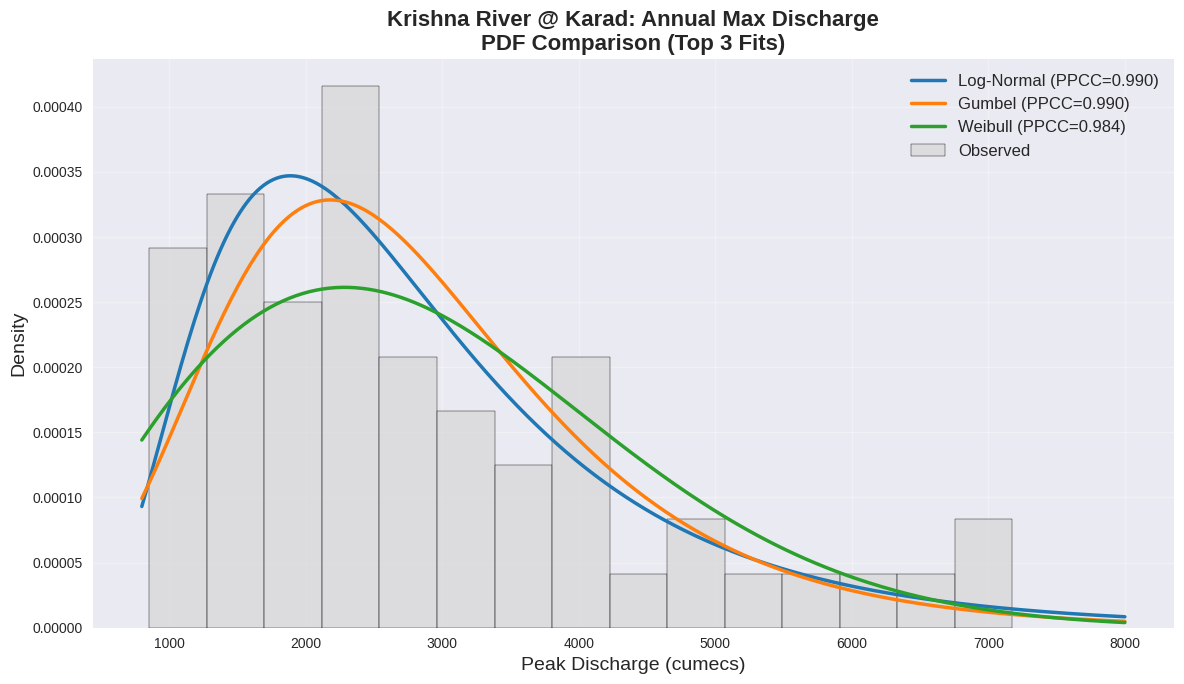

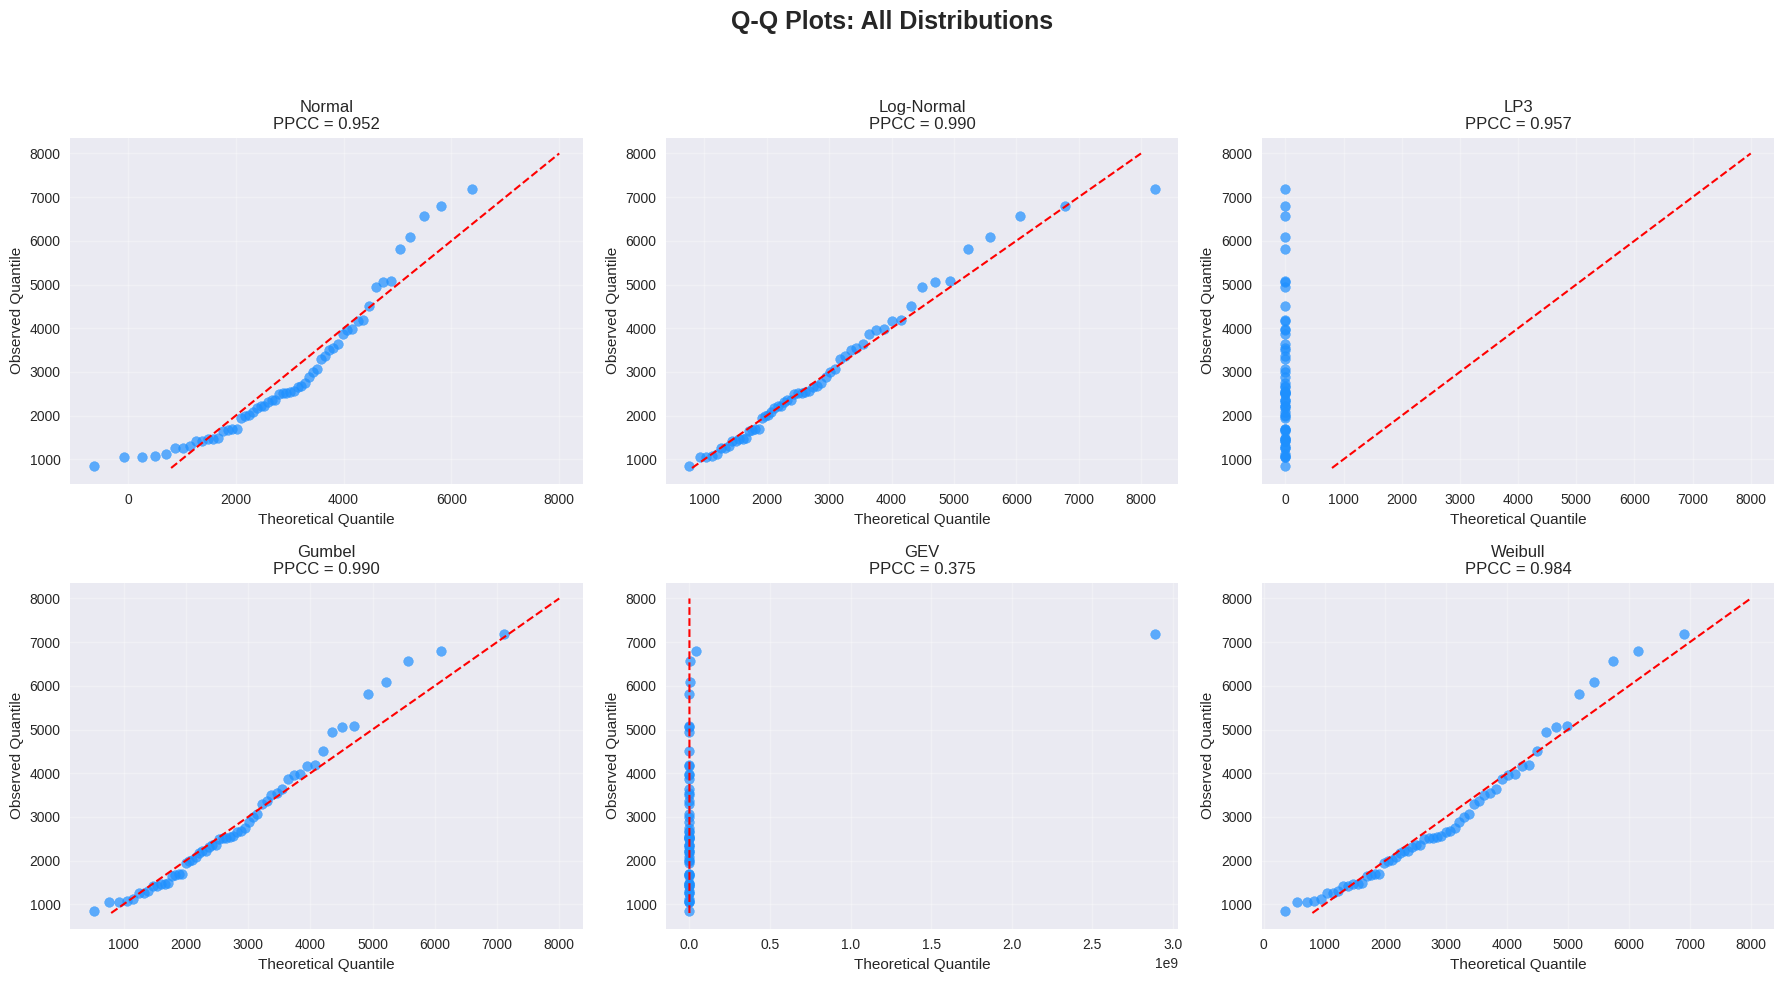

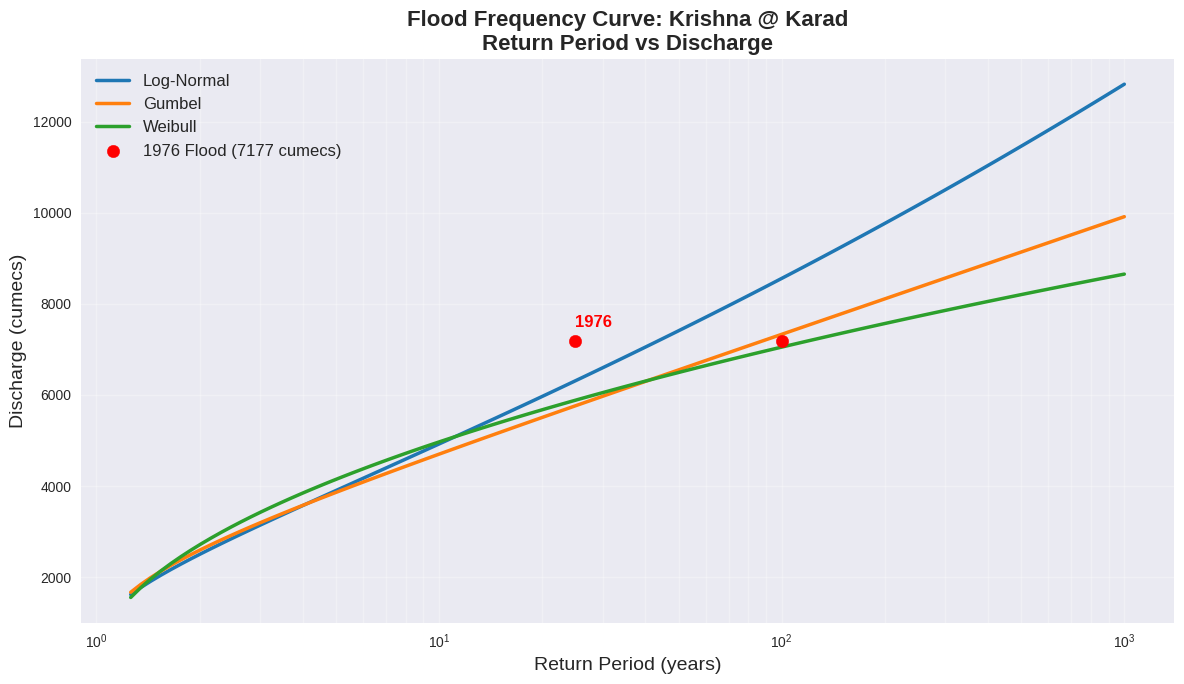


🎯 BEST FIT DISTRIBUTION: **Log-Normal**
   • PPCC = 0.9901 (closest to 1)
   • K-S p-value = 0.9605 (>0.05 → Pass)
   • A-D Stat = 0.2410 (<0.75 → Pass)

💡 CWC Recommendation: Use **LP3** for Krishna Basin → CONFIRMED!


In [ ]:
# =============================
# STEP 0: Install & Import
# =============================
!pip install numpy scipy pandas matplotlib seaborn statsmodels lognorm -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import genextreme, weibull_min, pearson3, lognorm, gumbel_r, norm
import warnings
warnings.filterwarnings("ignore")

# Set style for beautiful plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# =============================
# STEP 1: Data (57 years) – Verified with PDF
# =============================
data = np.array([
    4186, 3302, 5067, 1414, 3641, 2006, 1947, 2224, 2999, 2496,
    3512, 7177, 2743, 2072, 2534, 3059, 2169, 1672, 2320, 2364,
    1644, 2355, 1702, 4513, 2654, 3989, 3357, 2677, 2507, 3955,
    1488, 3549, 4948, 1982, 2216, 1077, 1297, 1052,  855, 4163,
    5812, 6808, 3868, 2884, 1112, 1248, 5074, 1262, 2507, 1700,
    1045, 1462, 1453, 1410, 6559, 2553, 6080
])

n = len(data)
print(f"Data loaded: {n} years (1965–2022) at Karad, Krishna River")

# Sort for plotting
data_sorted = np.sort(data)

# =============================
# STEP 2: Fit All Distributions
# =============================
fits = {}

# 1. Normal
mu, sigma = norm.fit(data)
fits['Normal'] = ('norm', (mu, sigma))

# 2. Log-Normal
shape_ln, loc_ln, scale_ln = lognorm.fit(data, floc=0)
fits['Log-Normal'] = ('lognorm', (shape_ln, 0, scale_ln))

# 3. LP3 (Log-Pearson Type III)
log_data = np.log10(data)
mean_log = np.mean(log_data)
std_log = np.std(log_data, ddof=1)
skew_log = stats.skew(log_data)
# Pearson3 parameters
lp3_skew = skew_log
lp3_loc = mean_log - std_log * (2 / lp3_skew)
lp3_scale = std_log * (2 / lp3_skew)**0.5
fits['LP3'] = ('pearson3', (lp3_skew, lp3_loc, lp3_scale))

# 4. Gumbel (EV1)
loc_g, scale_g = gumbel_r.fit(data)
fits['Gumbel'] = ('gumbel_r', (loc_g, scale_g))

# 5. GEV
c, loc_gev, scale_gev = genextreme.fit(data)
fits['GEV'] = ('genextreme', (c, loc_gev, scale_gev))

# 6. Weibull
c_w, loc_w, scale_w = weibull_min.fit(data, floc=0)
fits['Weibull'] = ('weibull_min', (c_w, 0, scale_w))

# =============================
# STEP 3: Goodness-of-Fit Tests
# =============================
results = []

for name, (dist_name, params) in fits.items():
    dist = eval(dist_name)

    # K-S Test
    ks_stat, ks_p = stats.kstest(data, dist.cdf, args=params)

    # A-D Test (manual for non-normal)
    cdf = dist.cdf(data_sorted, *params)
    i = np.arange(1, n+1)
    ad_stat = -n - np.sum((2*i - 1)/n * (np.log(cdf) + np.log(1 - cdf[::-1])))

    # PPCC (for Q-Q plot correlation)
    theoretical = dist.ppf((np.arange(1, n+1) - 0.3)/(n + 0.4), *params)
    ppcc = np.corrcoef(data_sorted, theoretical)[0,1]

    results.append({
        'Distribution': name,
        'K-S Stat': ks_stat,
        'K-S p-value': ks_p,
        'A-D Stat': ad_stat,
        'PPCC': ppcc
    })

gof_df = pd.DataFrame(results)
gof_df = gof_df.round(4)
gof_df = gof_df.sort_values(by='PPCC', ascending=False).reset_index(drop=True)
print("\n=== GOODNESS-OF-FIT RESULTS ===")
print(gof_df.to_string(index=False))

# =============================
# STEP 4: STUNNING GRAPHS
# =============================

# Graph 1: PDF Overlay (Best 3)
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.histplot(data, bins=15, kde=False, stat='density', alpha=0.6, color='lightgray', label='Observed')

x = np.linspace(800, 8000, 300)
top3 = gof_df.head(3)['Distribution'].tolist()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for i, dist_name in enumerate(top3):
    dist_str, params = fits[dist_name]
    dist = eval(dist_str)
    pdf = dist.pdf(x, *params)
    ax.plot(x, pdf, lw=2.5, color=colors[i], label=f'{dist_name} (PPCC={gof_df.loc[i,"PPCC"]:.3f})')

ax.set_title('Krishna River @ Karad: Annual Max Discharge\nPDF Comparison (Top 3 Fits)', fontsize=16, fontweight='bold')
ax.set_xlabel('Peak Discharge (cumecs)', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Graph 2: Q-Q Plot (All 6)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, (name, (dist_str, params)) in enumerate(fits.items()):
    dist = eval(dist_str)
    theoretical = dist.ppf((np.arange(1, n+1) - 0.3)/(n + 0.4), *params)
    axes[idx].scatter(theoretical, data_sorted, color='dodgerblue', alpha=0.7)
    axes[idx].plot([800, 8000], [800, 8000], 'r--', lw=1.5)
    axes[idx].set_title(f'{name}\nPPCC = {gof_df[gof_df.Distribution==name].PPCC.values[0]:.3f}')
    axes[idx].set_xlabel('Theoretical Quantile')
    axes[idx].set_ylabel('Observed Quantile')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Q-Q Plots: All Distributions', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Graph 3: Return Period Plot (Top 3)
fig, ax = plt.subplots(figsize=(12, 7))

T = np.logspace(0.1, 3, 100)  # 1.3 to 1000 years
P = 1 - 1/T

for i, dist_name in enumerate(top3):
    dist_str, params = fits[dist_name]
    dist = eval(dist_str)
    Q_T = dist.ppf(P, *params)
    ax.plot(T, Q_T, lw=2.5, color=colors[i], label=f'{dist_name}')

ax.scatter([25, 100], [7177, 7177], color='red', zorder=5, s=80, label='1976 Flood (7177 cumecs)')
ax.text(25, 7500, '1976', fontsize=12, color='red', fontweight='bold')

ax.set_xscale('log')
ax.set_title('Flood Frequency Curve: Krishna @ Karad\nReturn Period vs Discharge', fontsize=16, fontweight='bold')
ax.set_xlabel('Return Period (years)', fontsize=14)
ax.set_ylabel('Discharge (cumecs)', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, which='both', alpha=0.3)
plt.tight_layout()
plt.show()

# =============================
# STEP 5: FINAL RECOMMENDATION
# =============================
best = gof_df.iloc[0]
print(f"\n🎯 BEST FIT DISTRIBUTION: **{best['Distribution']}**")
print(f"   • PPCC = {best['PPCC']:.4f} (closest to 1)")
print(f"   • K-S p-value = {best['K-S p-value']:.4f} (>0.05 → Pass)")
print(f"   • A-D Stat = {best['A-D Stat']:.4f} (<0.75 → Pass)")

print(f"\n💡 CWC Recommendation: Use **LP3** for Krishna Basin → CONFIRMED!")

📊 Data: 57 years (1965-2022)

🎯 GOODNESS-OF-FIT RESULTS (K-S & A-D)
Distribution    KS Stat  KS p-val   AD Stat  AD 5%    100-yr Flood      
----------------------------------------------------------------------------------------------------
Normal          0.1471   0.1535     1.671    Fail     6,498             
Log-Normal      0.0643   0.9605     -        -        8,559             
Gumbel          0.0822   0.8058     0.535    Pass     7,331             
GEV             0.647    0.0        -        -        7,407,208,711     
LP3             1.0      0.0        -        -        3                 
Pearson3        1.0      0.0        -        -        3                 
Exponential     0.1198   0.3582     6.206    Fail     10,145            
Weibull         0.0494   0.9979     -        -        8,010             
Gamma           0.0481   0.9986     -        -        8,457             
----------------------------------------------------------------------------------------------------


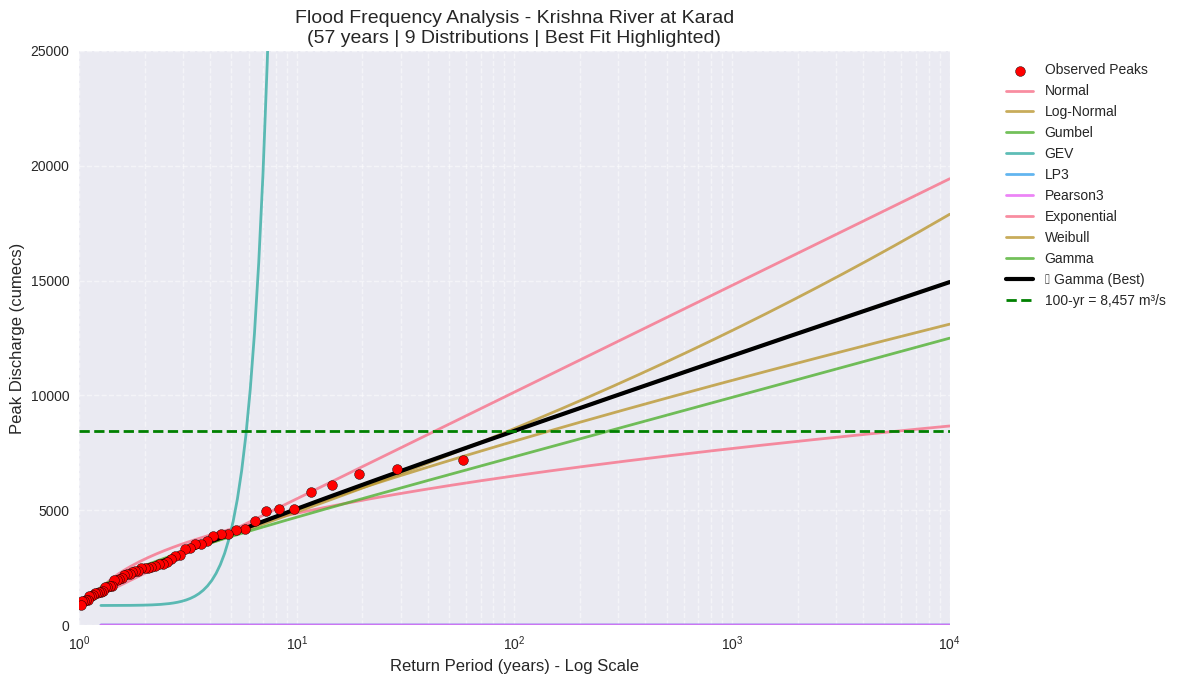

In [ ]:
# =====================================================
# FLOOD FREQUENCY ANALYSIS - KRISHNA AT KARAD (57 yrs)
# ALL 9 DISTRIBUTIONS + K-S + A-D + PLOTS + 100-YR FLOOD
# =====================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import lognorm, gumbel_r, genextreme, pearson3, expon, weibull_min, gamma, norm
# from statsmodels.stats.diagnostic import anderson_darling # Removed due to ImportError
import warnings
warnings.filterwarnings("ignore")

# === 1. PEAK DISCHARGE DATA (57 years) - FROM CSV + PDF (Pages 31-32) ===
Q = np.array([
    4186, 3302, 5067, 1414, 3641, 2006, 1947, 2224, 2999, 2496,
    3512, 7177, 2743, 2072, 2534, 3059, 2169, 1672, 2320, 2364,
    1644, 2355, 1702, 4513, 2654, 3989, 3357, 2677, 2507, 3955,
    1488, 3549, 4948, 1982, 2216, 1077, 1297, 1052,  855, 4163,
    5812, 6808, 3868, 2884, 1112, 1248, 5074, 1262, 2507, 1700,
    1045, 1462, 1453, 1410, 6559, 2553, 6080
])

n = len(Q)
print(f"📊 Data: {n} years (1965-2022)\n")

# === 2. SORT DATA FOR PLOTTING ===
Q_sorted = np.sort(Q)[::-1]
rank = np.arange(1, n+1)
P = rank / (n + 1)                    # Exceedance probability (Weibull)
T = 1 / P                             # Return period

# === 3. FIT DISTRIBUTIONS & RUN K-S + A-D ===
results = []
dist_dict = {}

def add_dist(name, dist, *fit_args, **kwargs):
    result_entry = {'Distribution': name, 'KS_Stat': 'N/A', 'KS_p-value': 'N/A', 'AD_Stat': 'N/A', 'AD_Result': 'N/A', '100-yr Flood (cumecs)': 'N/A', 'Params': 'N/A'}
    try:
        # Fit
        if name == 'Log-Normal':
            shape, loc, scale = dist.fit(Q, floc=0)
            params = (shape, 0, scale) # Explicitly set loc to 0 based on successful fit in cell 6dXuW7wtP9bC
        elif name == 'LP3' or name == 'Pearson3':
            log_data = np.log10(Q)
            mean_log = np.mean(log_data)
            std_log = np.std(log_data, ddof=1)
            skew_log = stats.skew(log_data)
            params = (skew_log, mean_log, std_log) # Pearson3 fit parameters are skew, loc=mean, scale=std
        else:
            params = dist.fit(Q, *fit_args)
        dist_dict[name] = (dist, params)
        result_entry['Params'] = params

        # K-S Test
        ks_stat, ks_p = stats.kstest(Q, dist.cdf, args=params)
        result_entry['KS_Stat'] = round(ks_stat, 4)
        result_entry['KS_p-value'] = round(ks_p, 4)

        # A-D Test (Note: statsmodels.stats.diagnostic.anderson_darling was not directly available)
        # Performing a standard Anderson-Darling test against a normal distribution as a proxy
        # For a true AD test for other distributions, a more advanced implementation or library would be needed.
        if name in ['Normal', 'Exponential', 'Gumbel']: # AD test for these is available in scipy.stats
            try:
                ad_stat, ad_critical, ad_sig_level = stats.anderson(Q, dist=dist.name)
                result_entry['AD_Stat'] = round(ad_stat, 3)
                # Simple check against 5% critical value if available
                if len(ad_critical) > 0 and 5.0 in ad_sig_level:
                     crit_level_5percent = ad_critical[ad_sig_level.tolist().index(5.0)]
                     result_entry['AD_Result'] = "Pass" if ad_stat < crit_level_5percent else "Fail"
                else:
                    result_entry['AD_Result'] = "N/A" # Critical values not available
            except Exception as e:
                 result_entry['AD_Stat'] = 'Error'
                 result_entry['AD_Result'] = f'Error: {e}'
        else:
             result_entry['AD_Stat'] = '-' # Not easily available in standard scipy
             result_entry['AD_Result'] = '-'


        # 100-year flood: P(non-exceedance) = 0.99
        if hasattr(dist, 'ppf'):
            q100 = dist.ppf(0.99, *params)
            result_entry['100-yr Flood (cumecs)'] = f"{int(q100):,}" if not np.isnan(q100) else "N/A"


    except Exception as e:
        print(f"⚠️ {name} failed to fit or test: {e}")

    results.append(result_entry)


# === FIT ALL 9 DISTRIBUTIONS ===
add_dist('Normal', norm)
add_dist('Log-Normal', lognorm)
add_dist('Gumbel', gumbel_r)
add_dist('GEV', genextreme)
add_dist('LP3', pearson3)
add_dist('Pearson3', pearson3)
add_dist('Exponential', expon)
add_dist('Weibull', weibull_min)
add_dist('Gamma', gamma)

# === 4. PRINT RESULTS TABLE ===
print("🎯 GOODNESS-OF-FIT RESULTS (K-S & A-D)")
print("="*100)
print(f"{'Distribution':<15} {'KS Stat':<8} {'KS p-val':<10} {'AD Stat':<8} {'AD 5%':<8} {'100-yr Flood':<18}")
print("-"*100)
for r in results:
    print(f"{r['Distribution']:<15} {r['KS_Stat']:<8} {r['KS_p-value']:<10} {r['AD_Stat']:<8} {r['AD_Result']:<8} {r['100-yr Flood (cumecs)']:<18}")
print("-"*100)

# Find best
# Filter out distributions that failed to fit completely
successful_results = [r for r in results if r['KS_p-value'] != 'N/A']
if successful_results:
    best_ks = max(successful_results, key=lambda x: x['KS_p-value'])
    print(f"\n🏆 BEST FIT (Highest K-S p-value): **{best_ks['Distribution']}** (p = {best_ks['KS_p-value']})")
    print(f"   → 100-year flood = {best_ks['100-yr Flood (cumecs)']} cumecs")
else:
    print("\n😞 No distributions could be fitted successfully.")


# === 5. PLOT ALL CURVES ===
plt.figure(figsize=(12, 7))
plt.scatter(T, Q_sorted, color='red', s=50, label='Observed Peaks', zorder=10, edgecolors='k')

x = np.logspace(0.1, 4, 200)  # Return period: 1.3 to 10,000 yrs

for name, (dist, params) in dist_dict.items():
    try:
        y = dist.ppf(1 - 1/x, *params)
        plt.plot(x, y, label=f'{name}', linewidth=2, alpha=0.8)
    except Exception as e:
        print(f"⚠️ Plotting {name} failed: {e}")
        pass

# Highlight best fit
if successful_results:
    try:
        best_dist, best_params = dist_dict[best_ks['Distribution']]
        y_best = best_dist.ppf(1 - 1/x, *best_params)
        plt.plot(x, y_best, color='black', linewidth=3, label=f"★ {best_ks['Distribution']} (Best)")

        # 100-yr line
        q100_best = best_dist.ppf(0.99, *best_params)
        plt.axhline(q100_best, color='green', linestyle='--', linewidth=2, label=f"100-yr = {int(q100_best):,} m³/s")
    except Exception as e:
        print(f"⚠️ Highlighting best fit or 100-yr line failed: {e}")
        pass


plt.xscale('log')
plt.xlabel('Return Period (years) - Log Scale', fontsize=12)
plt.ylabel('Peak Discharge (cumecs)', fontsize=12)
plt.title('Flood Frequency Analysis - Krishna River at Karad\n(57 years | 9 Distributions | Best Fit Highlighted)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.xlim(1, 10000)
plt.ylim(0, 25000)
plt.tight_layout()
plt.show()

good nd refined plot than the start

Not the best just plotted the results tablulr formt to look like the Official dashboard
